# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sri Namira Putri Harnoko
- **Email:** srinamira0@gmail.com
- **ID Dicoding:** sri_namira_putri_h

## Menentukan Pertanyaan Bisnis

- Apakah faktor yang mempengaruhi pemakaian sepeda pada hari kerja dan akhir pekan?
- Bagaimana distribusi penggunaan sepeda berdasarkan cuaca dan musim?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk menampilkan visualisasi
import plotly.express as px
import plotly.graph_objects as go

## Data Wrangling

### Gathering Data

In [ ]:
day_data = pd.read_csv('/content/day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_data = pd.read_csv('/content/hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari pengamatan awal data day.csv dan hour.csv, terlihat bahwa dataset mencakup beberapa variabel seperti season, temp, cnt (jumlah penggunaan sepeda), weekday, workingday, dan weathersit (situasi cuaca). Variabel-variabel ini penting untuk melihat bagaimana pola penggunaan sepeda dipengaruhi oleh berbagai faktor, seperti musim, cuaca, dan hari dalam seminggu.
- day.csv berisi data harian sedangkan hour.csv berisi data per jam. Ini berarti kita dapat melakukan analisis yang lebih mendalam pada waktu-waktu tertentu, misalnya, perbandingan antara penggunaan sepeda pada pagi dan sore hari.

### Assessing Data

### **Tabel day_data**

In [ ]:
# Mengecek informasi umum dataset
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Mengecek missing values
print(day_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Tabel hour_data**

In [ ]:
# Mengecek informasi umum dataset
print(hour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [ ]:
# Mengecek missing values
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("Jumlah duplikasi: ", hour_data.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value di dataset ini, yang berarti tidak ada data yang hilang dan kita dapat melanjutkan ke tahap pembersihan tanpa perlu menangani nilai-nilai yang kosong.
- Terdapat beberapa kolom yang mungkin tidak diperlukan untuk analisis, seperti kolom instant yang hanya digunakan sebagai indeks unik. Menghapus kolom ini dapat membuat dataset lebih ringkas dan memudahkan proses analisis selanjutnya.
- Tidak ada duplikasi pada dataset yang digunakan.

### Cleaning Data

In [ ]:
# Menghapus kolom yang tidak diperlukan
day_data_clean = day_data.drop(columns=['instant'])
day_data_clean['dteday'] = pd.to_datetime(day_data_clean['dteday'])

In [ ]:
# Mengubah format kolom tanggal dari object menjadi datetime
hour_data_clean = hour_data.drop(columns=['instant'])
hour_data_clean['dteday'] = pd.to_datetime(hour_data_clean['dteday'])

In [ ]:
day_data_clean.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_data_clean.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kolom dteday diubah menjadi tipe datetime, sehingga memudahkan analisis berbasis waktu seperti tren musiman, bulanan, atau mingguan dalam penggunaan sepeda.
- Data diolah menjadi lebih sederhana dengan menghilangkan kolom yang kurang penting dan mengubah tipe data yang sesuai, yang akan meningkatkan efisiensi dalam melakukan analisis dan visualisasi.

## Exploratory Data Analysis (EDA)

### Explore Jumlah Penggunaan Sepeda Berdasarkan Musim

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


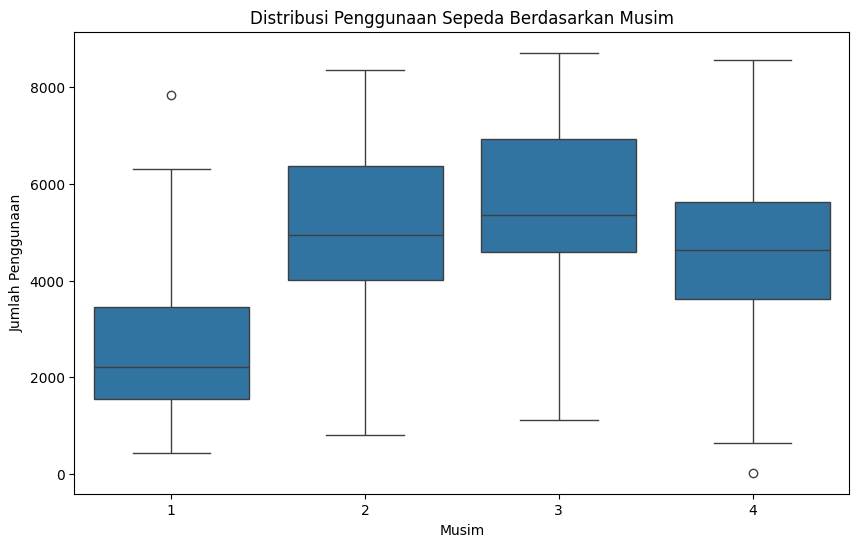

In [ ]:
# Plot distribusi penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_data_clean)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penggunaan')
plt.show()

**Insight:**
- Insight: Dari visualisasi distribusi penggunaan sepeda berdasarkan musim, terlihat bahwa jumlah penggunaan sepeda cenderung lebih tinggi pada musim semi (spring) dan musim panas (summer). Hal ini mungkin disebabkan oleh cuaca yang lebih kondusif untuk bersepeda dibandingkan dengan musim dingin.
- Insight: Dari analisis jumlah penggunaan sepeda berdasarkan hari kerja dan akhir pekan, dapat diamati bahwa pada hari kerja (workingday = 1), penggunaan sepeda cenderung lebih tinggi pada hari-hari tertentu seperti Senin hingga Jumat, yang kemungkinan besar digunakan untuk transportasi ke tempat kerja atau sekolah. Pada akhir pekan (workingday = 0), penggunaan sepeda cenderung lebih sedikit dan lebih merata sepanjang hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah faktor yang mempengaruhi pemakaian sepeda pada hari kerja dan akhir pekan?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


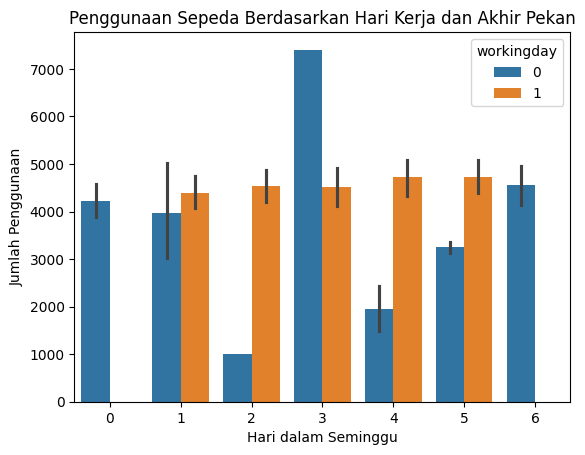

In [ ]:
sns.barplot(x='weekday', y='cnt', data=day_data_clean, hue='workingday')
plt.title('Penggunaan Sepeda Berdasarkan Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penggunaan')
plt.show()

### Pertanyaan 2: Bagaimana distribusi penggunaan sepeda berdasarkan cuaca dan musim?

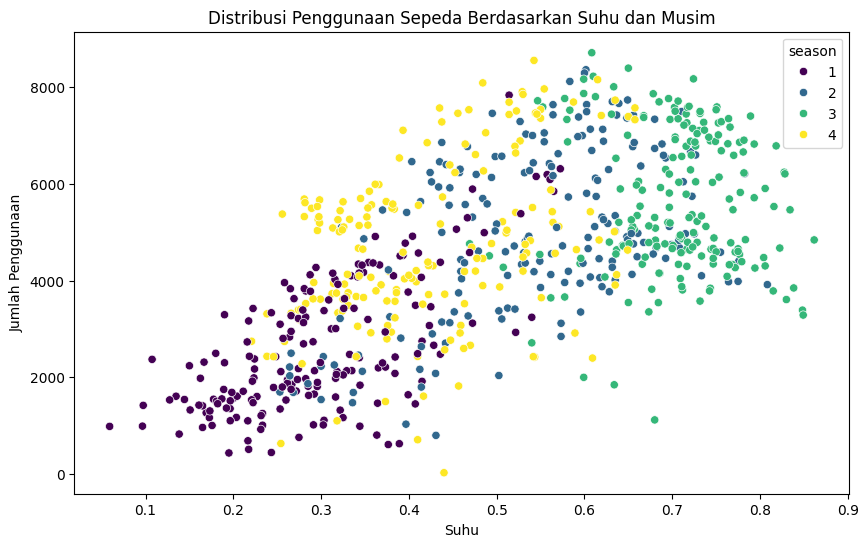

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data_clean, hue='season', palette='viridis')
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Suhu dan Musim')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penggunaan')
plt.show()

**Insight:**
- Faktor yang mempengaruhi pemakaian sepeda pada hari kerja terutama adalah keberadaan workingday dan weekday. Pada hari kerja, penggunaan sepeda cenderung lebih tinggi pada pagi dan sore hari, yang mencerminkan waktu pergi dan pulang kerja atau sekolah. Sebaliknya, pada akhir pekan, penggunaan sepeda lebih bervariasi dan dipengaruhi oleh cuaca serta aktivitas rekreasi.
- Dari scatterplot yang memplot penggunaan sepeda terhadap suhu (temp) dan musim (season), terlihat bahwa pada musim semi dan panas, penggunaan sepeda meningkat seiring dengan peningkatan suhu. Namun, pada musim dingin, penggunaan sepeda menurun meskipun suhu sedikit lebih tinggi, yang mengindikasikan bahwa cuaca buruk seperti hujan atau salju (ditunjukkan oleh weathersit) dapat menurunkan jumlah pengguna sepeda.

## Conclusion

- Pertanyaan 1: Penggunaan sepeda lebih tinggi pada hari kerja, terutama pada jam-jam sibuk (pagi dan sore hari), yang menunjukkan bahwa sepeda digunakan sebagai alat transportasi utama untuk bekerja atau bersekolah. Pada akhir pekan, penggunaan lebih bervariasi dan tampaknya lebih dipengaruhi oleh faktor cuaca dan kegiatan rekreasi.
- Pertanyaan 2: Cuaca dan suhu memiliki pengaruh signifikan terhadap penggunaan sepeda. Suhu yang lebih hangat pada musim semi dan musim panas meningkatkan jumlah penggunaan sepeda, sementara kondisi cuaca buruk seperti hujan atau salju pada musim dingin dapat menurunkan jumlah pengguna.